In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latitude and longitude to a list
coordinates = list(lat_lngs)
coordinates

[(1.3735281971099909, 111.47904386730755),
 (-87.35558476427506, 8.632003989529409),
 (-28.85197377466752, 108.77200273352281),
 (-46.98135437006888, 71.09408987020103),
 (85.11671175021021, -32.45968319288403),
 (63.21930963169498, -12.17500017456399),
 (40.55955895059412, -110.35515159611539),
 (-21.495155305579786, -122.994135554525),
 (45.497056672150364, 151.07424849157968),
 (13.018417895159871, -5.035971236492372),
 (-29.794622526963863, 16.696645852559215),
 (-81.0636030990003, -28.518775939905794),
 (-37.8842916664445, 60.898908402683674),
 (-8.268222443027483, 74.74704011569807),
 (74.85258667809495, 104.92594399769354),
 (-26.432658405205956, -178.43452189263027),
 (1.877533640097539, -24.673438294690868),
 (-56.32016847989867, -115.14893684704462),
 (29.964860207097814, -163.3745317598091),
 (18.488793640294915, -117.70646901085729),
 (55.439211865541864, -54.151162581546146),
 (73.84412388979075, 12.154285869341436),
 (-68.15701642885996, 0.2353132615504876),
 (75.80036975

In [4]:
# import citipy module
from citipy import citipy

In [5]:
# create a list for holding the cities
cities = []
# identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# print the city count to confirm sufficient count
len(cities)

616

In [6]:
# import the requests library
import requests

# import the API key
from config import weather_api_key

In [128]:
# starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [129]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [130]:
# declare empty list to hold weather data
city_data = []

# print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all cities in our list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count}) | {city}")
    # add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1) | sri aman
Processing Record 2 of Set 1) | hermanus
Processing Record 3 of Set 1) | geraldton
Processing Record 4 of Set 1) | souillac
Processing Record 5 of Set 1) | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1) | hofn
Processing Record 7 of Set 1) | evanston
Processing Record 8 of Set 1) | rikitea
Processing Record 9 of Set 1) | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1) | kimparana
Processing Record 11 of Set 1) | springbok
Processing Record 12 of Set 1) | ushuaia
Processing Record 13 of Set 1) | saint-philippe
Processing Record 14 of Set 1) | hithadhoo
Processing Record 15 of Set 1) | khatanga
Processing Record 16 of Set 1) | vaini
Processing Record 17 of Set 1) | touros
Processing Record 18 of Set 1) | kapaa
Processing Record 19 of Set 1) | constitucion
Processing Record 20 of Set 1) | saint anthony
Processing Record 21 of Set 1) | bar

City not found. Skipping...
Processing Record 35 of Set 4) | provideniya
Processing Record 36 of Set 4) | sandwick
Processing Record 37 of Set 4) | flin flon
Processing Record 38 of Set 4) | bilibino
Processing Record 39 of Set 4) | tanshui
City not found. Skipping...
Processing Record 40 of Set 4) | taoudenni
Processing Record 41 of Set 4) | katangli
Processing Record 42 of Set 4) | vila velha
Processing Record 43 of Set 4) | flinders
Processing Record 44 of Set 4) | wajir
Processing Record 45 of Set 4) | hambantota
Processing Record 46 of Set 4) | oskarshamn
Processing Record 47 of Set 4) | pontes e lacerda
Processing Record 48 of Set 4) | east london
Processing Record 49 of Set 4) | lochgilphead
Processing Record 50 of Set 4) | vestmannaeyjar
Processing Record 1 of Set 5) | saldanha
Processing Record 2 of Set 5) | diglur
Processing Record 3 of Set 5) | kidal
Processing Record 4 of Set 5) | dubuque
Processing Record 5 of Set 5) | nanortalik
Processing Record 6 of Set 5) | port lincol

Processing Record 17 of Set 8) | voh
Processing Record 18 of Set 8) | husavik
Processing Record 19 of Set 8) | khandyga
Processing Record 20 of Set 8) | egvekinot
Processing Record 21 of Set 8) | kita
Processing Record 22 of Set 8) | lodwar
Processing Record 23 of Set 8) | linaon
Processing Record 24 of Set 8) | ahipara
Processing Record 25 of Set 8) | parati
Processing Record 26 of Set 8) | ararat
Processing Record 27 of Set 8) | halifax
Processing Record 28 of Set 8) | aloleng
Processing Record 29 of Set 8) | san pedro
Processing Record 30 of Set 8) | tulun
Processing Record 31 of Set 8) | puerto leguizamo
Processing Record 32 of Set 8) | bathsheba
Processing Record 33 of Set 8) | petropavlovsk-kamchatskiy
Processing Record 34 of Set 8) | alice springs
Processing Record 35 of Set 8) | orlik
Processing Record 36 of Set 8) | rabo de peixe
Processing Record 37 of Set 8) | kamaishi
Processing Record 38 of Set 8) | karaton
Processing Record 39 of Set 8) | yulara
Processing Record 40 of Se

Processing Record 2 of Set 12) | hannibal
Processing Record 3 of Set 12) | bani walid
Processing Record 4 of Set 12) | yangambi
Processing Record 5 of Set 12) | komsomolskiy
Processing Record 6 of Set 12) | fram
Processing Record 7 of Set 12) | najran
Processing Record 8 of Set 12) | beruni
City not found. Skipping...
Processing Record 9 of Set 12) | barahona
Processing Record 10 of Set 12) | ust-tsilma
Processing Record 11 of Set 12) | nordhorn
Processing Record 12 of Set 12) | port hardy
Processing Record 13 of Set 12) | tibiri
Processing Record 14 of Set 12) | iqaluit
Processing Record 15 of Set 12) | honiara
Processing Record 16 of Set 12) | peace river
Processing Record 17 of Set 12) | babanusah
City not found. Skipping...
Processing Record 18 of Set 12) | levashovo
Processing Record 19 of Set 12) | robertsport
Processing Record 20 of Set 12) | roald
Processing Record 21 of Set 12) | tilichiki
Processing Record 22 of Set 12) | thinadhoo
Processing Record 23 of Set 12) | mantua
Pro

In [131]:
len(city_data)

565

In [132]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sri Aman,1.24,111.46,77.00,94,40,2.24,MY,2020-08-19 02:03:29
1,Hermanus,-34.42,19.23,46.99,73,75,5.84,ZA,2020-08-19 02:03:29
2,Geraldton,-28.77,114.60,59.00,77,44,10.29,AU,2020-08-19 02:03:30
3,Souillac,-20.52,57.52,71.60,68,40,10.29,MU,2020-08-19 01:58:47
4,Hofn,64.25,-15.21,48.27,84,100,19.06,IS,2020-08-19 02:03:30
5,Evanston,42.04,-87.69,71.60,46,20,10.29,US,2020-08-19 01:59:10
6,Rikitea,-23.12,-134.97,71.85,81,38,8.19,PF,2020-08-19 02:03:30
7,Kimparana,12.83,-4.92,77.32,85,100,1.68,ML,2020-08-19 02:03:31
8,Springbok,-29.66,17.89,37.87,78,100,3.85,ZA,2020-08-19 02:03:31
9,Ushuaia,-54.80,-68.30,32.00,90,40,13.87,AR,2020-08-19 01:59:37


In [133]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sri Aman,MY,2020-08-19 02:03:29,1.24,111.46,77.00,94,40,2.24
1,Hermanus,ZA,2020-08-19 02:03:29,-34.42,19.23,46.99,73,75,5.84
2,Geraldton,AU,2020-08-19 02:03:30,-28.77,114.60,59.00,77,44,10.29
3,Souillac,MU,2020-08-19 01:58:47,-20.52,57.52,71.60,68,40,10.29
4,Hofn,IS,2020-08-19 02:03:30,64.25,-15.21,48.27,84,100,19.06
5,Evanston,US,2020-08-19 01:59:10,42.04,-87.69,71.60,46,20,10.29
6,Rikitea,PF,2020-08-19 02:03:30,-23.12,-134.97,71.85,81,38,8.19
7,Kimparana,ML,2020-08-19 02:03:31,12.83,-4.92,77.32,85,100,1.68
8,Springbok,ZA,2020-08-19 02:03:31,-29.66,17.89,37.87,78,100,3.85
9,Ushuaia,AR,2020-08-19 01:59:37,-54.80,-68.30,32.00,90,40,13.87


In [134]:
# create the output file (csv)
output_data_file = "weather_data/cities.csv"

# export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [135]:
# use new df
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Sri Aman,MY,2020-08-19 02:03:29,1.24,111.46,77.00,94,40,2.24
1,1,Hermanus,ZA,2020-08-19 02:03:29,-34.42,19.23,46.99,73,75,5.84
2,2,Geraldton,AU,2020-08-19 02:03:30,-28.77,114.60,59.00,77,44,10.29
3,3,Souillac,MU,2020-08-19 01:58:47,-20.52,57.52,71.60,68,40,10.29
4,4,Hofn,IS,2020-08-19 02:03:30,64.25,-15.21,48.27,84,100,19.06


In [136]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [137]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/18/20'

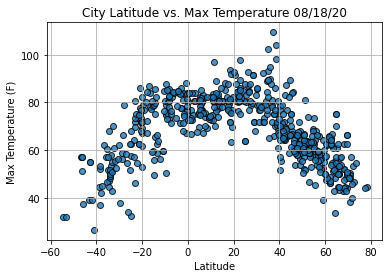

In [138]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig1.png")

# Show plot.
plt.show()

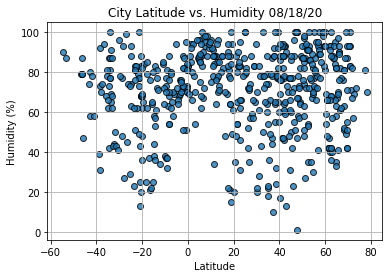

In [139]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig2.png")

# Show plot.
plt.show()

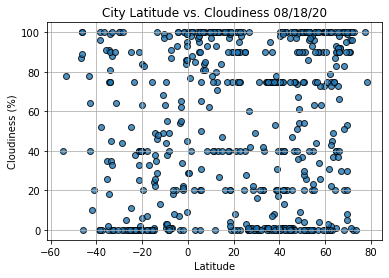

In [140]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig3.png")

# Show plot.
plt.show()

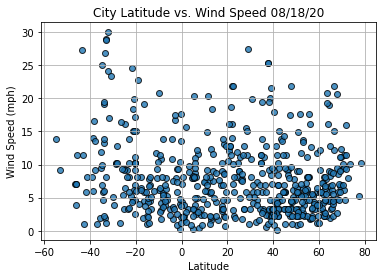

In [141]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/fig4.png")

# Show plot.
plt.show()

In [142]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [143]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the x and y values.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(linregress(x_values, y_values))

In [144]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                        Vaini
Country                        TO
Date          2020-08-19 02:03:32
Lat                         -21.2
Lng                        -175.2
Max Temp                     73.4
Humidity                      100
Cloudiness                     90
Wind Speed                  14.99
Name: 13, dtype: object

In [145]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Sri Aman,MY,2020-08-19 02:03:29,1.24,111.46,77.00,94,40,2.24
4,4,Hofn,IS,2020-08-19 02:03:30,64.25,-15.21,48.27,84,100,19.06
5,5,Evanston,US,2020-08-19 01:59:10,42.04,-87.69,71.60,46,20,10.29
7,7,Kimparana,ML,2020-08-19 02:03:31,12.83,-4.92,77.32,85,100,1.68
12,12,Khatanga,RU,2020-08-19 02:03:32,71.97,102.50,53.47,57,0,15.95


In [146]:
# create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

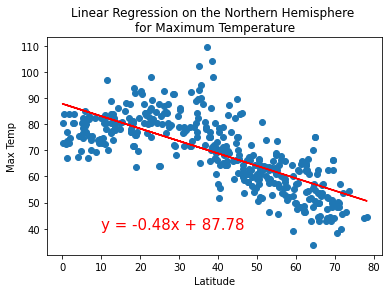

LinregressResult(slope=-0.4750248908944043, intercept=87.78496570052491, rvalue=-0.7316742384939161, pvalue=6.745508894091857e-68, stderr=0.02223900195570951)


In [147]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature",
                       "Max Temp", (10,40))

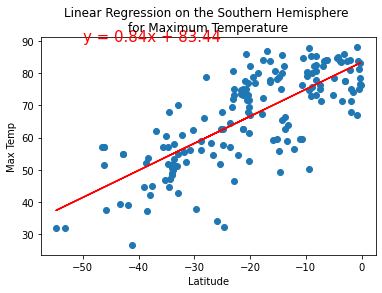

LinregressResult(slope=0.8408820378920011, intercept=83.43734700182917, rvalue=0.7570752866273954, pvalue=2.5592099446201274e-32, stderr=0.056491755207425005)


In [148]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor Maximum Temperature",
                       "Max Temp",(-50,90))

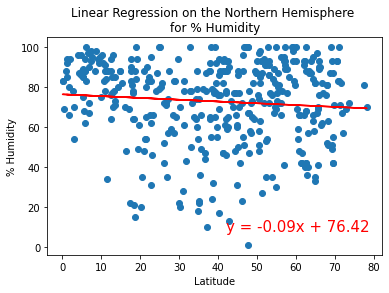

LinregressResult(slope=-0.08979688508565643, intercept=76.4204226431462, rvalue=-0.09002852517389488, pvalue=0.07280374672297146, stderr=0.04991905602201835)


In [149]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor % Humidity",
                       "% Humidity", (42,8))

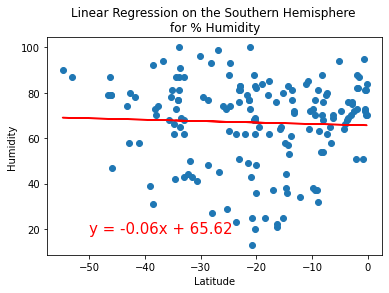

LinregressResult(slope=-0.06237714444917706, intercept=65.62060965955314, rvalue=-0.04267938663187152, pvalue=0.5839348032121561, stderr=0.11367617372534707)


In [150]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor % Humidity",
                       "Humidity",(-50,18))

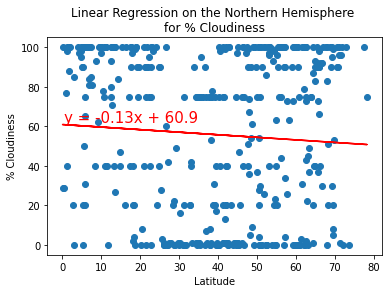

LinregressResult(slope=-0.12940651878653345, intercept=60.90478455955811, rvalue=-0.06662797229743393, pvalue=0.18466832696441737, stderr=0.09738360330113792)


In [151]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor % Cloudiness",
                       "% Cloudiness", (0.5,62))

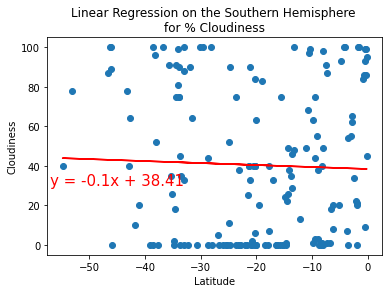

LinregressResult(slope=-0.10000442549045489, intercept=38.41167111169467, rvalue=-0.03510581370936731, pvalue=0.652423120898368, stderr=0.2216309571262824)


In [152]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor % Cloudiness",
                       "Cloudiness",(-57,30))

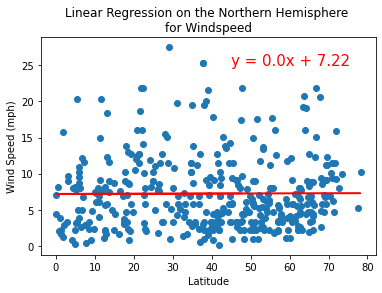

LinregressResult(slope=0.0007148923738298614, intercept=7.220341599258813, rvalue=0.002935151721807889, pvalue=0.9534522816699729, stderr=0.012239414563147987)


In [154]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor Windspeed",
                       "Wind Speed (mph)", (45,25))

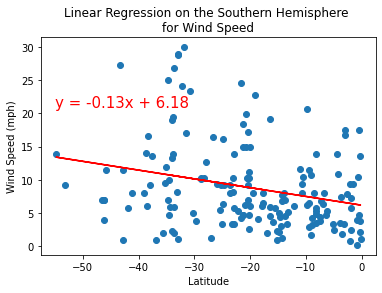

LinregressResult(slope=-0.1320411789608652, intercept=6.182752154009199, rvalue=-0.2692057104670515, pvalue=0.0004348982839229567, stderr=0.0367744964348659)


In [158]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor Wind Speed",
                       "Wind Speed (mph)",(-55,21))